In [2]:
import camelot
import numpy as np
import pandas as pd
import json
from stuff import output_directory, tablestocellinfo, file, filename, cleanuptables
import os
import sys

In [3]:
def is_first_page(df):
    for x in df.iloc[:,0].values:
        if 'Hæf' in x:
            return True
    return False

def get_first_date_cell(df):
    import re
    for row_idx,row in df.iterrows():
        for col_idx, cell in enumerate(row):
            # print(f'row {row_idx}, col {col_idx}, cell: {cell}')
            if re.match('[0-9][0-9]\.[0-9][0-9]', cell):
                return col_idx,row_idx

def get_num_pages(tables):
    counts = []
    last_first_page = 0
    for idx,table in enumerate(tables):
        if is_first_page(table.df):
            if idx > 0:
                counts.append(idx - last_first_page)
                last_first_page = idx
    if len(set(counts)) == 1:
        return counts[0]
    else:
        return counts

In [4]:
# tables = camelot.read_pdf(file,pages='1-end',flavor='stream',row_tol=10,line_scale=20)
tables = camelot.read_pdf(file,pages='1-end',flavor='lattice',line_scale=20)
cellinfo = tablestocellinfo(tables)

In [11]:
c = tables[0].cells[5][10]
print(f'{c.text} x = {c.x1 - (c.x1 * 0.01)} * xscale, y = {c.y1 - (c.y1 * 0.01)} * yscale',dir(c))

# dir(tables[0])
# tables[0].data

ORLOF
 x = 506.54501132941846 * xscale, y = 410.38729850649196 * yscale ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_text', 'bottom', 'bound', 'hspan', 'lb', 'left', 'lt', 'rb', 'right', 'rt', 'text', 'top', 'vspan', 'x1', 'x2', 'y1', 'y2']


In [ ]:
for table in tables:
    print(is_first_page(table.df),get_first_date_cell(table.df))

In [ ]:
pages = []

for idx,table in enumerate(tables):
    if is_first_page(table.df):

        temp = table.df.iloc[1:,1:]
        temp.iloc[0,0] = 'Starfsmaður'
        pages.append(temp)
        # i = i + 1
        # print(table.df.iloc[2:,1:].head())
    else:
        first_page = pages[len(pages)-1]
        if not get_first_date_cell(first_page):
            x,y = get_first_date_cell(table.df)
            first_page.iloc[0,1:] = table.df.iloc[y,x:]
            x,y = get_first_date_cell(tables[1].df)
            # print(x,y)
            current_page = table.df.iloc[y+1:,x-1:]
            first_page = pd.concat([first_page,current_page],ignore_index=True)
            # print(first_page)
            # first_page.to_csv(os.path.join(output_directory,str(idx) + 'table.csv'))
            




In [6]:
parts = []
for offset in range(0,len(tables),get_num_pages(tables)):
    first_page = tables[0+offset].df.iloc[1:,1:].copy()
    first_page.iloc[0,0] = 'Starfsmaður'
    second_page = tables[1+offset].df.copy()
    third_page = tables[2+offset].df.copy()

    first_page.index -= 1
    first_page.columns -= 1
    # second_page.index -= 1
    # third_page.index -= 1


    x,y = get_first_date_cell(second_page)
    first_page.iloc[0,1:] = second_page.iloc[y,x:]

    second_page = second_page.iloc[y+1:,x-1:]
    second_page.index -= 1 
    second_page.columns -= 1

    x,y = get_first_date_cell(third_page)
    third_page = third_page.iloc[y+1:,x-1:]
    third_page.index -= 1
    third_page.columns -= 1

    joined = pd.concat([first_page,second_page,third_page],ignore_index = True)
    joined.iloc[:,:]#.to_csv(os.path.join(output_directory,'out' + str(offset) + '.csv'))
    parts.append(joined)
pd.concat(parts,axis=1,ignore_index=True).to_csv(os.path.join(output_directory,'testaALLT.csv'))

In [ ]:
df = tables[2].df.copy()
('accuracy',
 'cells',
 'cols',
 'data',
 'df',
 'flavor',
 'order',
 'page',
 'parsing_report',
 'rows',
 'set_all_edges',
 'set_border',
 'set_edges',
 'set_span',
 'shape',
 'to_csv',
 'to_excel',
 'to_html',
 'to_json',
 'to_markdown',
 'to_sqlite',
 'whitespace')

In [ ]:
camelot.plot(tables[2], kind='grid').show()

In [ ]:
for table in tables:
    print(table.shape)

In [ ]:
x,y = get_first_date_cell(tables[5].df)
print(x,y)
print(tables[5].df.iloc[y,x])
tables[5].df

In [ ]:
temp = tables[0].df.iloc[:,:]
temp.head()

In [ ]:
pages

In [ ]:
pd.concat([tables[0].df.iloc[1:,1:],tables[1].df],ignore_index=True)

In [ ]:
first_page.index -= 1
first_page.index

In [ ]:
t1 = tables[1].df.copy()
t2 = tables[2].df.copy()

# t1 = t1.iloc[1:,:]
# t1 = t1.drop(t1.columns[[0]],axis=1)
t2 = t2.iloc[1:,:]

# print(get_first_date_cell(t2))
# pd.concat([t1,t2],ignore_index=True)

# t = t1.drop(t1.columns[[0]],axis=1)
# t2

print(len(t1.iloc[0]), len(t2.iloc[0]))

t1.columns -=1


# t2

out = pd.concat(
    [
        t1,
        t2,
    ],
    ignore_index=True
)

In [ ]:
out.drop(out.columns[[0]],axis=1)

In [15]:
import pdfplumber
def get_pdf_size(filepath):
    with pdfplumber.open(filepath) as pdf:
        page_1 = pdf.pages[0]
    return page_1.height, page_1.width

In [69]:
from pdf2image import convert_from_path
pdfs = convert_from_path(file)

h,w = get_pdf_size(file)
new_h,new_w = pdfs[0].height, pdfs[0].width
def get_converted_pixel(img, x,y):
    converter = h/new_h
    new_x, new_y = converter * x, converter * y
    return img.getpixel((x,y))

In [16]:
get_pdf_size(file)

(595.275574, 841.889771)

In [19]:
pdfs[0].getpixel((10,10))

(255, 255, 255)

In [70]:
t = tables[0].cells[10][10]
print(t.text)
print('color:',get_converted_pixel(pdfs[0],(t.x1 + t.x2)/2, (t.y1 + t.y2)/2))
# t.x2
# dir(t)
# print(f'{t.x2 - t.x1} * {t.y2 - t.y1}')
# get_converted_pixel(pdfs[0],300,500)

ORLOF

color: (128, 0, 64)


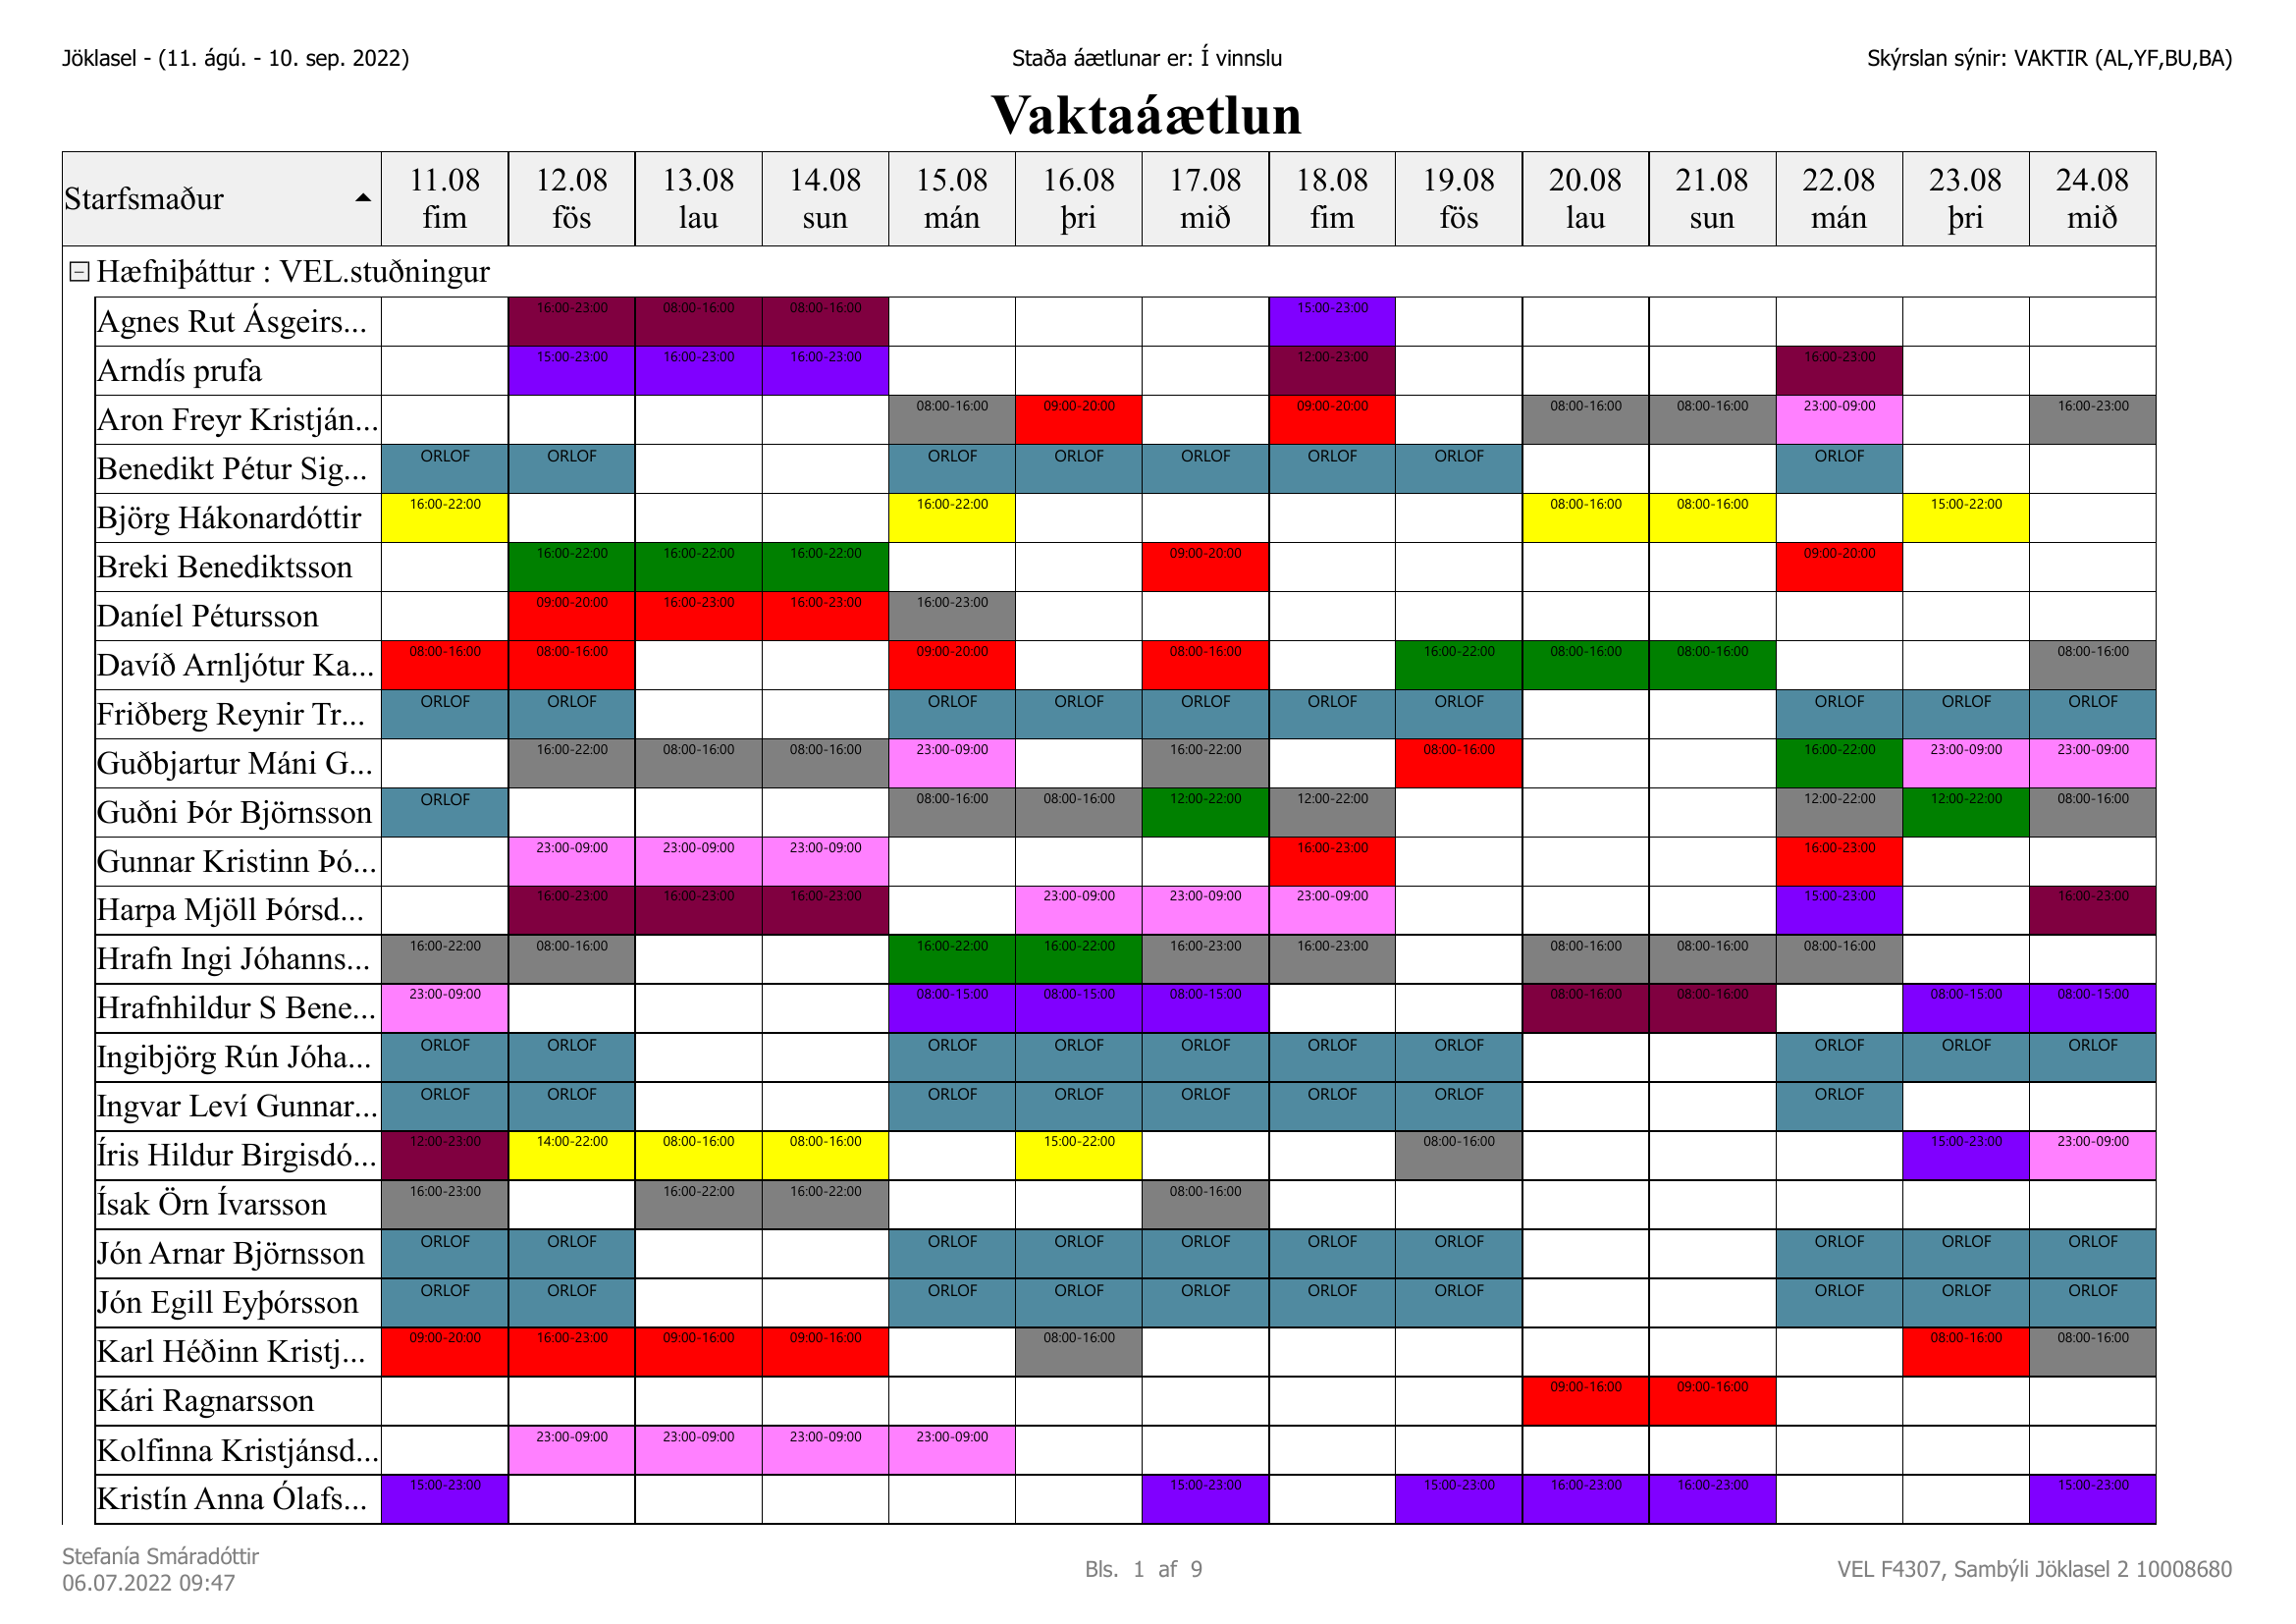

In [23]:
pdfs[0]